## Map with regions for forecast

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import hvplot.xarray
import numpy as np
import pandas as pd
import matplotlib as mpl
import cartopy.io.shapereader as shpreader
import cartopy.mpl as cm 
import scipy.stats as sps
from matplotlib.patches import Rectangle

In [5]:
import warnings
warnings.filterwarnings('ignore')

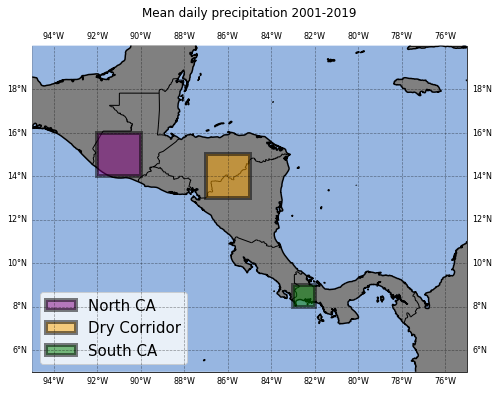

In [7]:
# map extent a bit larger than dataset
extent = [-95,-75, 5, 20]

plt.figure( figsize=(12,6) ) 
ax = plt.axes( projection = ccrs.PlateCarree() ) 
ax.set_extent(extent)

#ds.precip.mean(dim='time').plot(ax=ax, cmap='YlGnBu', zorder=3, vmax=15)

ax.set_title('Mean daily precipitation 2001-2019', y=1.07)
ax.add_feature(cfeature.OCEAN, zorder=3)
ax.add_feature(cfeature.LAND, edgecolor='black', color='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='black', zorder=4)
ax.coastlines(linewidth=1.5,zorder=4)

# Add mask for countries outside Central America
shpfilename = shpreader.natural_earth( resolution='10m',
                                category='cultural',
                                name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
countries_masked = ['MEX', 'COL' ]
for country in countries:
        if country.attributes['ADM0_A3'] in countries_masked:
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                                facecolor='gray',
                                label=country.attributes['ADM0_A3'],
                                zorder=3)
        else:
                continue

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.7, color='black', alpha=0.4, 
                  linestyle='--', zorder=7)



#NINO34 region
rdic = {'North CA': [-92, -90, 14, 16 ], 
        'Dry Corridor':[-87,-85, 13, 15], 
        'South CA': [-83,-82, 8, 9]}

colors = ['purple', 'orange', 'green']
i=0

for region in rdic:
    
    ax.add_patch(   Rectangle( (rdic[region][0], rdic[region][2]),
                            rdic[region][1]-rdic[region][0],
                            rdic[region][3]-rdic[region][2],
                facecolor=colors[i], lw=4.0,
                edgecolor='black', alpha=0.5, 
                label=region, zorder=5))
    i+=1

ax.legend(loc='lower left', fontsize=15)

            
lal=np.arange(4,22,2)
lol=np.arange(-94,74,2)
gl.ylocator = mpl.ticker.FixedLocator(lal )
gl.xlocator = mpl.ticker.FixedLocator(lol )


gl.xformatter = cm.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cm.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

#plt.savefig('ca_mean-daily-prep_2001-2019.png')

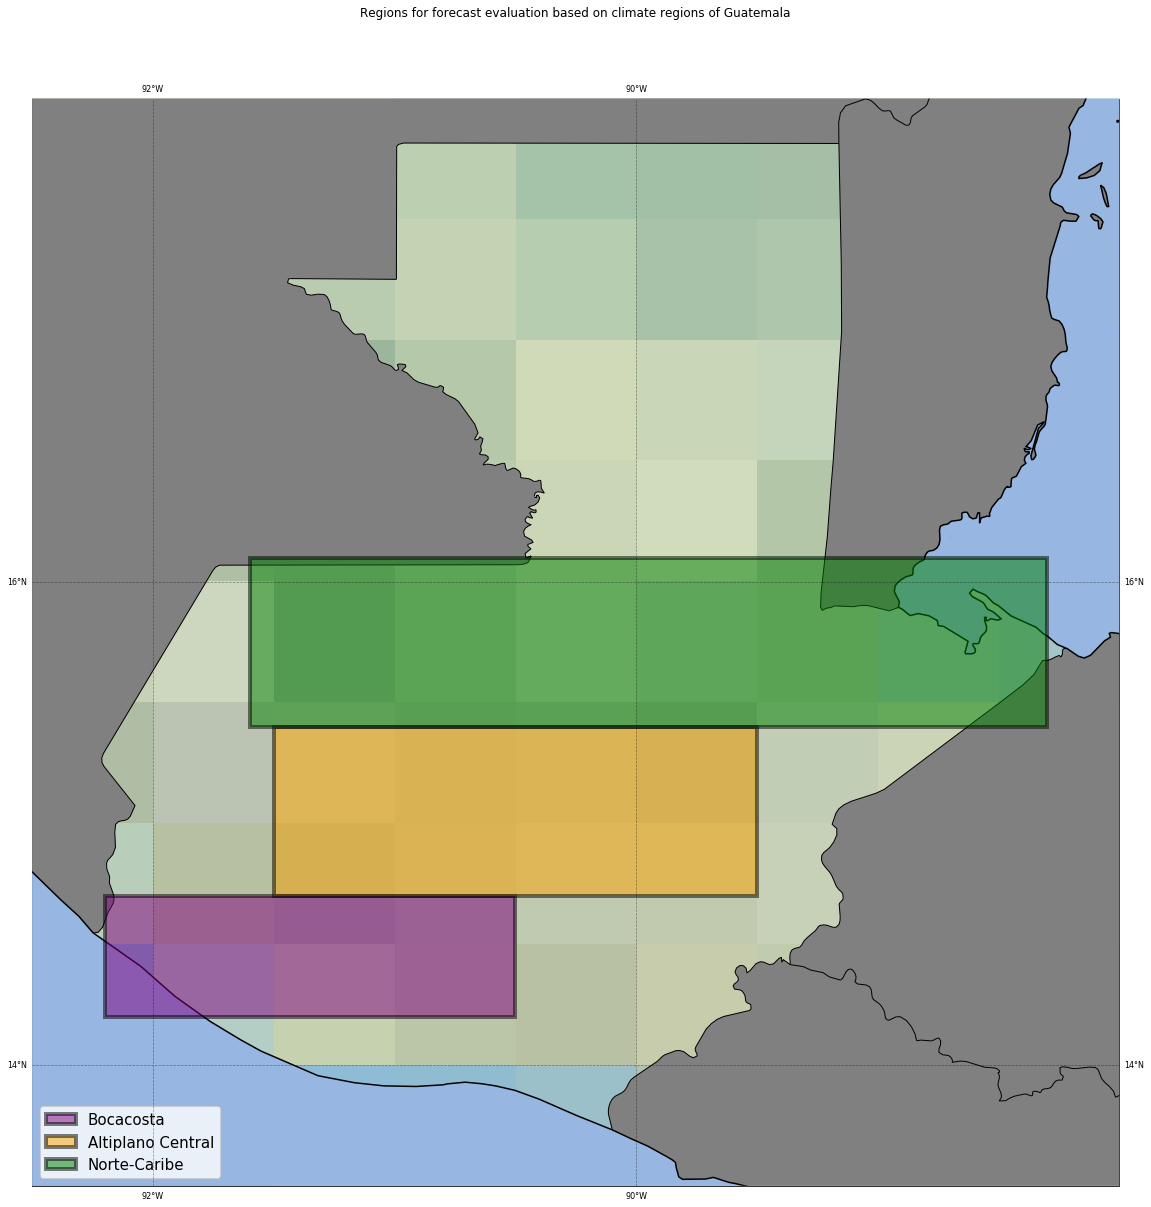

In [14]:
extent = [-92.5,-88, 13.5, 18 ]

plt.figure( figsize=(20,20) ) 
ax = plt.axes( projection = ccrs.PlateCarree() ) 
ax.set_extent(extent)

#ds.precip.mean(dim='time').plot(ax=ax, cmap='YlGnBu', zorder=3, vmax=15)

ax.set_title('Regions for forecast evaluation based on climate regions of Guatemala', y=1.07)
ax.add_feature(cfeature.OCEAN, zorder=3)
ax.add_feature(cfeature.LAND, edgecolor='black', color='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='black', zorder=4)
ax.coastlines(linewidth=1.5,zorder=4)
ax.stock_img()

# Add mask for countries outside Central America
shpfilename = shpreader.natural_earth( resolution='10m',
                                category='cultural',
                                name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
countries_masked = ['MEX', 'HND', 'SLV', 'BLZ' ]
for country in countries:
        if country.attributes['ADM0_A3'] in countries_masked:
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                                facecolor='gray',
                                label=country.attributes['ADM0_A3'],
                                zorder=3)
        else:
                continue

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.7, color='black', alpha=0.4, 
                  linestyle='--', zorder=7)



#NINO34 region
rdic = {'Bocacosta': [-92.2, -90.5, 14.2, 14.7 ], 
        'Altiplano Central':[-91.5,-89.5, 14.7, 15.4], 
        'Norte-Caribe': [-91.6,-88.3, 15.4, 16.1]}

colors = ['purple', 'orange', 'green']
i=0

for region in rdic:
    
    ax.add_patch(   Rectangle( (rdic[region][0], rdic[region][2]),
                            rdic[region][1]-rdic[region][0],
                            rdic[region][3]-rdic[region][2],
                facecolor=colors[i], lw=4.0,
                edgecolor='black', alpha=0.5, 
                label=region, zorder=5))
    i+=1

ax.legend(loc='lower left', fontsize=15)

            
lal=np.arange(4,22,2)
lol=np.arange(-94,74,2)
gl.ylocator = mpl.ticker.FixedLocator(lal )
gl.xlocator = mpl.ticker.FixedLocator(lol )


gl.xformatter = cm.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cm.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

#plt.savefig('ca_mean-daily-prep_2001-2019.png')